In [ ]:
!gdown --id 1w7nm0c2O5i1Vw1B-ulZRmyFSkdbxhWTW

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1w7nm0c2O5i1Vw1B-ulZRmyFSkdbxhWTW
To: /content/preprocessed_database_10000_0.5.csv
100% 54.3M/54.3M [00:01<00:00, 41.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:

df = pd.read_csv("preprocessed_database_10000_0.5.csv", converters={"comment_text": lambda x: x.strip("[]").replace("'","").split(", "), "stemmed_text": lambda x: x.strip("[]").replace("'","").split(", ")})
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,stemmed_text
0,5525909,0.000000,"[really, fox, news, world, net, daily, rush, l...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,1,0,0.0,0,4,"[realli, fox, news, world, net, daili, rush, l..."
1,689647,0.000000,"[cheri, gofundme, set, yet, services, etc]",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,3,0,0.0,0,4,"[cheri, gofundm, set, yet, servic, etc]"
2,825803,0.830508,"[trump, kgb, fsb, would, like, particularly, f...",0.084746,0.050847,0.016949,0.813559,0.0,approved,0,0,1,8,2,0.0,4,59,"[trump, kgb, fsb, would, like, particularli, f..."
3,5404446,0.000000,"[spot, would, add, feds, bring, something, tab...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,0,0,0.0,0,4,"[spot, would, add, fed, bring, someth, tabl, p..."
4,619755,0.000000,"[lean, governor, ige, dlnr, suzanne, case, ear...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,2,0,0.0,4,4,"[lean, governor, ige, dlnr, suzann, case, earl..."


In [ ]:
drop_cols = [ 'severe_toxicity', 'obscene', "identity_attack", 'threat', 'insult', 'rating', "funny",	"wow",	"sad"	,"likes",	"disagree"	,"sexual_explicit"	,"identity_annotator_count",	"toxicity_annotator_count" ]
df = df.drop(drop_cols, axis=1)
df["label"]=df["target"].apply(lambda x: 1 if x>=0.5 else 0)
df.head()

,id,target,comment_text,stemmed_text,label
0,5525909,0.000000,"[really, fox, news, world, net, daily, rush, l...","[realli, fox, news, world, net, daili, rush, l...",0
1,689647,0.000000,"[cheri, gofundme, set, yet, services, etc]","[cheri, gofundm, set, yet, servic, etc]",0
2,825803,0.830508,"[trump, kgb, fsb, would, like, particularly, f...","[trump, kgb, fsb, would, like, particularli, f...",1
3,5404446,0.000000,"[spot, would, add, feds, bring, something, tab...","[spot, would, add, fed, bring, someth, tabl, p...",0
4,619755,0.000000,"[lean, governor, ige, dlnr, suzanne, case, ear...","[lean, governor, ige, dlnr, suzann, case, earl...",0


**Random Forest Implementation **

Involves conversion of text data into vectors.

We used 100 trees for making this random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a DataFrame called 'df'
# X is the feature (stemmed text) and y is the target variable (label)
# X = df['stemmed_text'].apply(lambda x: ' '.join(x)).values
X = df['stemmed_text'].astype(str)
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print other metrics like classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     10078
           1       0.91      0.87      0.89      9922

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



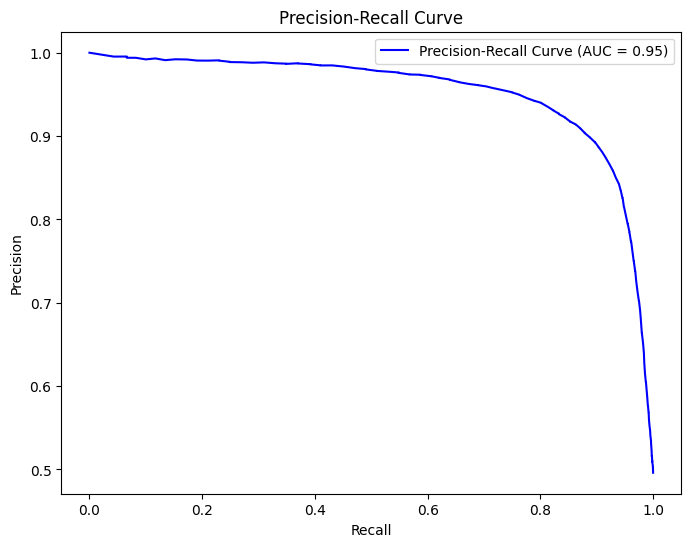

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Get the precision and recall values
precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test_vectorized)[:, 1])

# Calculate the area under the precision-recall curve
area_under_curve = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()